In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from numpy import random
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_breast_cancer

cancer_data=load_breast_cancer()

df=pd.DataFrame(cancer_data.data)
df.columns=cancer_data.feature_names
df['Type']=cancer_data.target
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [4]:
X=df.drop('Type', axis=1)

In [5]:
y=df.Type

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
tree=DecisionTreeClassifier()

In [10]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
tree.score(X_test,y_test)

0.9298245614035088

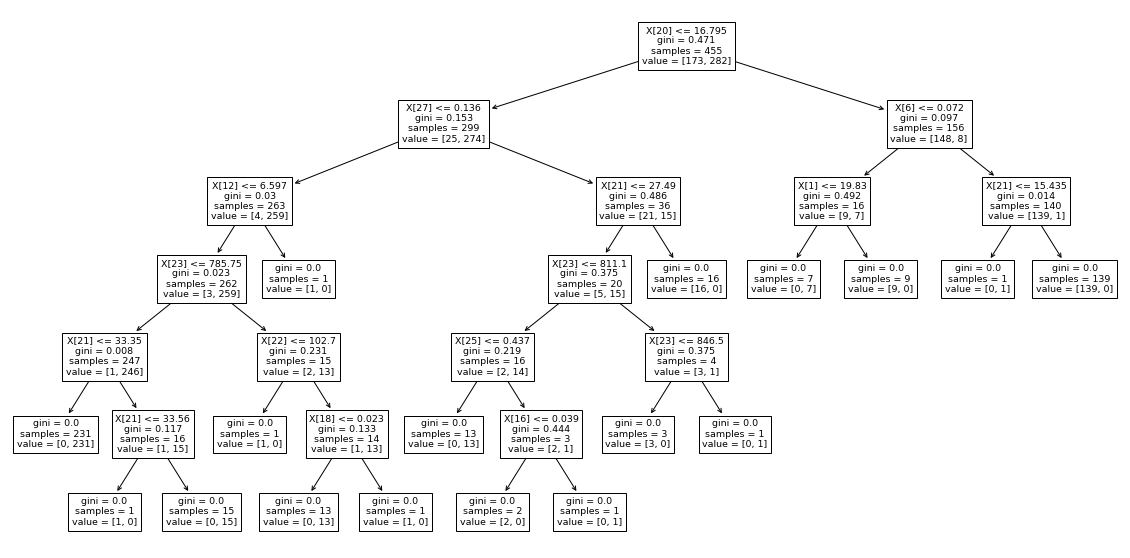

In [13]:
plt.figure(figsize=(20,10))
plot_tree(tree)
plt.show()

In [14]:
path=tree.cost_complexity_pruning_path(X_train,y_train)

In [20]:
ccp_alphas=path.ccp_alphas

In [21]:
ccp_alphas

array([0.        , 0.0021889 , 0.002886  , 0.0029304 , 0.0032967 ,
       0.00427919, 0.00436421, 0.0047619 , 0.00549451, 0.01449865,
       0.02197802, 0.04492543, 0.33724191])

In [34]:
dc_trees=[]
for i in ccp_alphas:
    dc=DecisionTreeClassifier(ccp_alpha=i, random_state=0)
    dc.fit(X_train,y_train)
    dc_trees.append(dc)

In [35]:
train_score=[dc.score(X_train,y_train) for dc in dc_trees]
test_score=[dc.score(X_test,y_test) for dc in dc_trees]

In [36]:
train_score

[1.0,
 0.9978021978021978,
 0.9934065934065934,
 0.9912087912087912,
 0.989010989010989,
 0.9868131868131869,
 0.9846153846153847,
 0.9824175824175824,
 0.978021978021978,
 0.9626373626373627,
 0.9406593406593406,
 0.9274725274725275,
 0.6197802197802198]

In [37]:
test_score

[0.9298245614035088,
 0.9298245614035088,
 0.9473684210526315,
 0.956140350877193,
 0.9649122807017544,
 0.9649122807017544,
 0.9649122807017544,
 0.9473684210526315,
 0.9385964912280702,
 0.9298245614035088,
 0.9385964912280702,
 0.9035087719298246,
 0.6578947368421053]

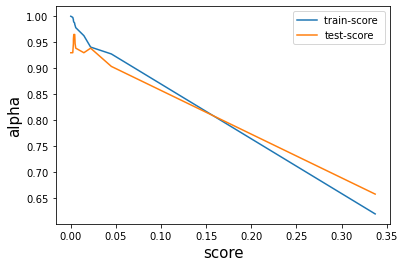

In [62]:
plt.plot(ccp_alphas,train_score)
plt.plot(ccp_alphas,test_score)
plt.xlabel("score",fontsize=15)
plt.ylabel("alpha",fontsize=15)
plt.legend(['train-score ','test-score'])


In [72]:

clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.03)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03, random_state=0)

[Text(502.20000000000005, 453.0, 'X[20] <= 16.795\ngini = 0.471\nsamples = 455\nvalue = [173, 282]'),
 Text(334.8, 271.8, 'X[27] <= 0.136\ngini = 0.153\nsamples = 299\nvalue = [25, 274]'),
 Text(167.4, 90.59999999999997, 'gini = 0.03\nsamples = 263\nvalue = [4, 259]'),
 Text(502.20000000000005, 90.59999999999997, 'gini = 0.486\nsamples = 36\nvalue = [21, 15]'),
 Text(669.6, 271.8, 'gini = 0.097\nsamples = 156\nvalue = [148, 8]')]

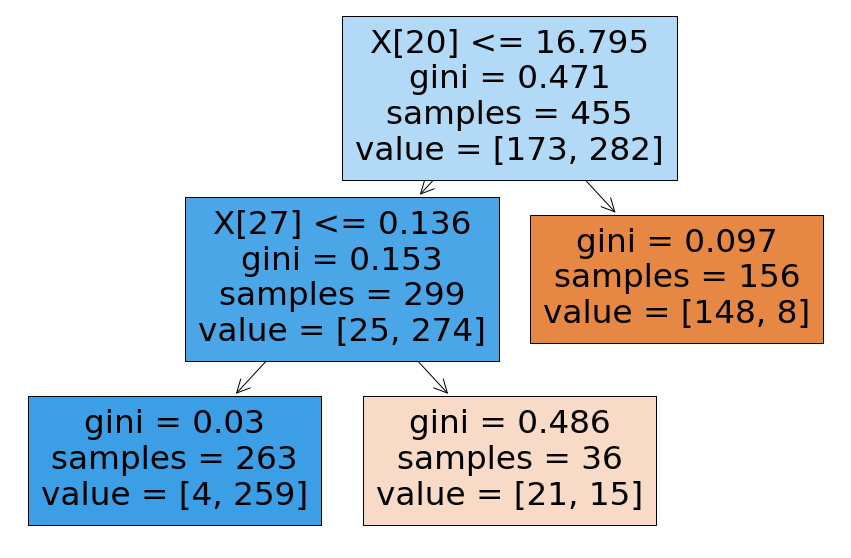

In [73]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [71]:
clf.score(X_test,y_test)

0.9385964912280702